In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
test = pd.read_csv('./data/digit/test.csv')
train = pd.read_csv('./data/digit/train.csv')

In [3]:
train.shape

(42000, 785)

In [90]:
x = train.iloc[0:10000,1:]
y = train.loc[0:10000-1,'label']
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.2, random_state = 0)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
img = x_train.iloc[1].as_matrix()

In [40]:
img = img.reshape(28, 28)

Text(0.5,1,'0')

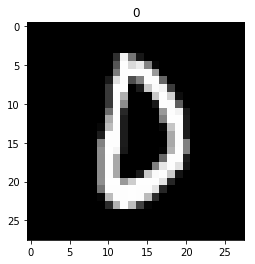

In [42]:
plt.imshow(img, cmap = 'gray')
plt.title(y_train.iloc[1])

In [22]:
svc = SVC(C = 1.0)

(array([567.,  17.,  12.,  11.,   3.,   9.,   9.,  11.,   7., 139.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

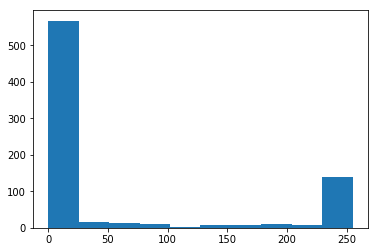

In [64]:
plt.hist(train.loc[1])

(array([579.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 205.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

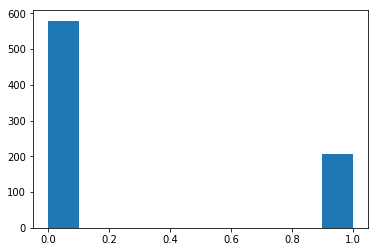

In [66]:
plt.hist(x_train.loc[3477])

In [72]:
 x_train[x_train>0.2] =1
 x_val[x_val>0.2] = 1

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [73]:
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
svc.score(x_val, y_val)

0.892875

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [50]:
%%time
knn.fit(x_train, y_train)


Wall time: 216 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [52]:
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [53]:
knn.score(x_val, y_val)

0.904125

In [85]:
x_test = test
result = knn.predict(x_test)


In [103]:
df = pd.DataFrame(result)
df.index.name = 'ImageID'
df.index+=1
df.columns = ['Label']
df.to_csv('results.csv', header = True, index_label = 'ImageID')

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1)

In [100]:
rfc.fit(x_train, y_train)
rfc.score(x_val, y_val)

In [102]:
result = rfc.predict(x_test)

In [93]:
?RandomForestClassifier